### Score: `[50]`

Q1. `[5+5+4]` 注意单位，ppb的量级

Q2. `[11+11]` Great job!

Q3. `[5+9]` Good job!

各题批注用`### Note`给出，请自行查阅。

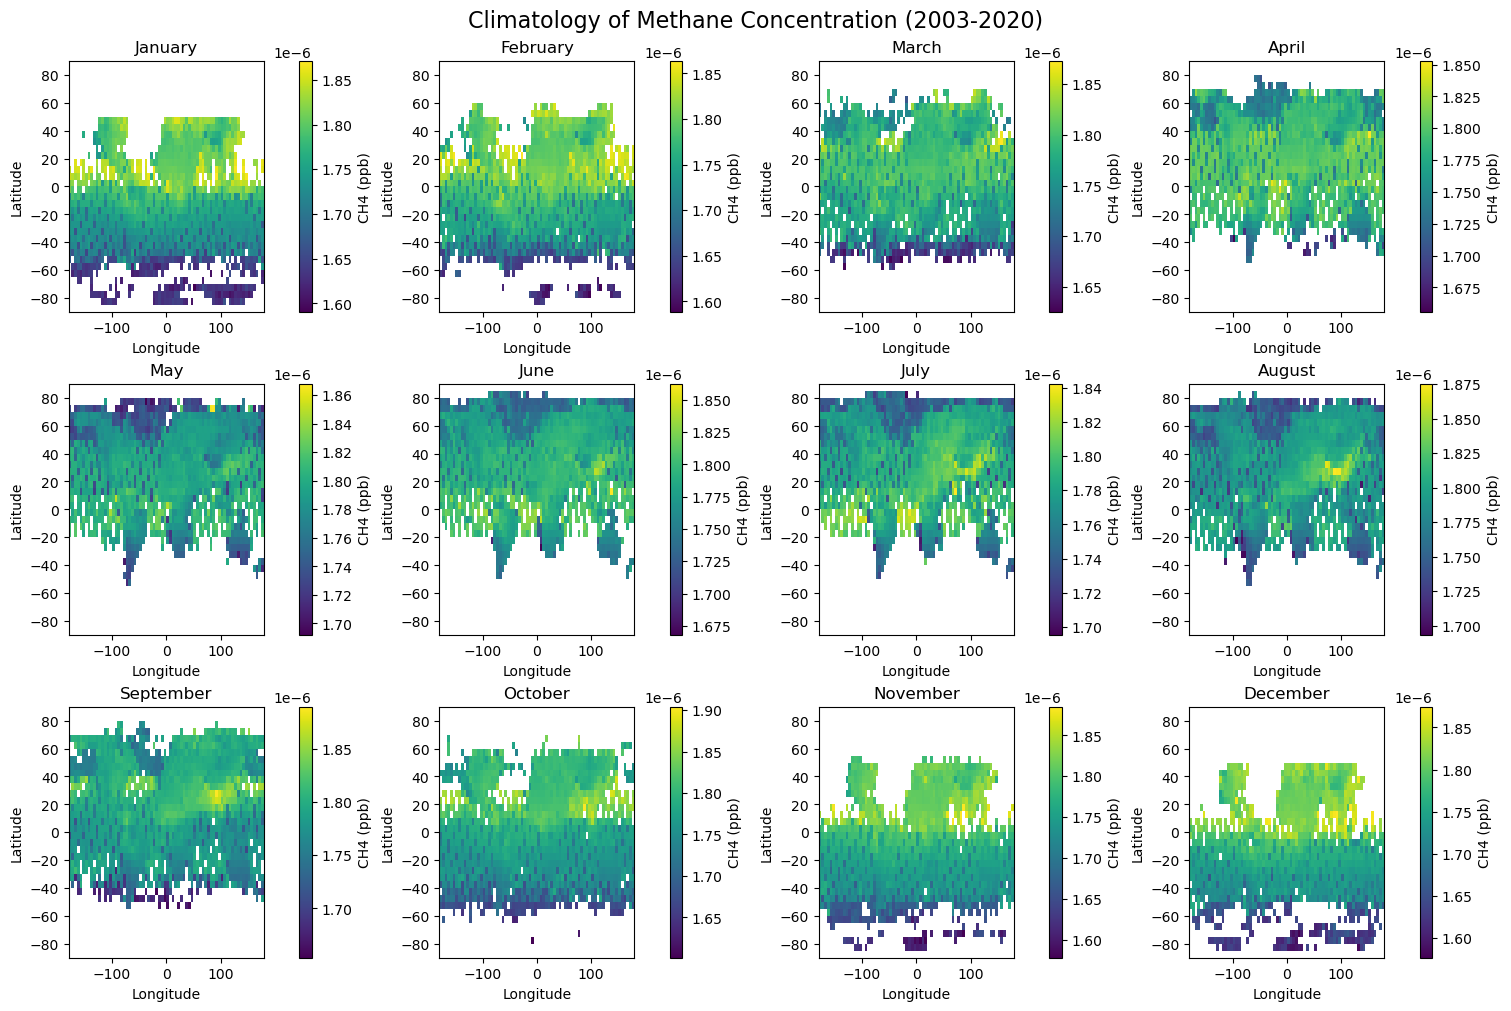

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# 加载 netCDF 文件
file_path = '200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc'
data = xr.open_dataset(file_path)

# 提取相关数据
xch4 = data['xch4']  # 甲烷浓度 (单位: ppb)
time = data['time']  # 时间维度

# 1.1 计算气候学（按月平均）并绘制 12 面板图
climatology = xch4.groupby('time.month').mean(dim='time')

# 定义月份名称列表
month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# 创建 12 面板图
fig, axes = plt.subplots(3, 4, figsize=(15, 10), constrained_layout=True)
for i, ax in enumerate(axes.flat, start=1):
    monthly_data = climatology.sel(month=i)
    im = ax.pcolormesh(monthly_data.lon, monthly_data.lat, monthly_data, shading='auto')
    ax.set_title(f"{month_names[i-1]}")  # 使用月份名称
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.colorbar(im, ax=ax, orientation="vertical", label="CH4 (ppb)")
    ### Note: 纵坐标如果要标ppb的话，数值要乘以10^9，以下同理

plt.suptitle("Climatology of Methane Concentration (2003-2020)", fontsize=16)
plt.show()

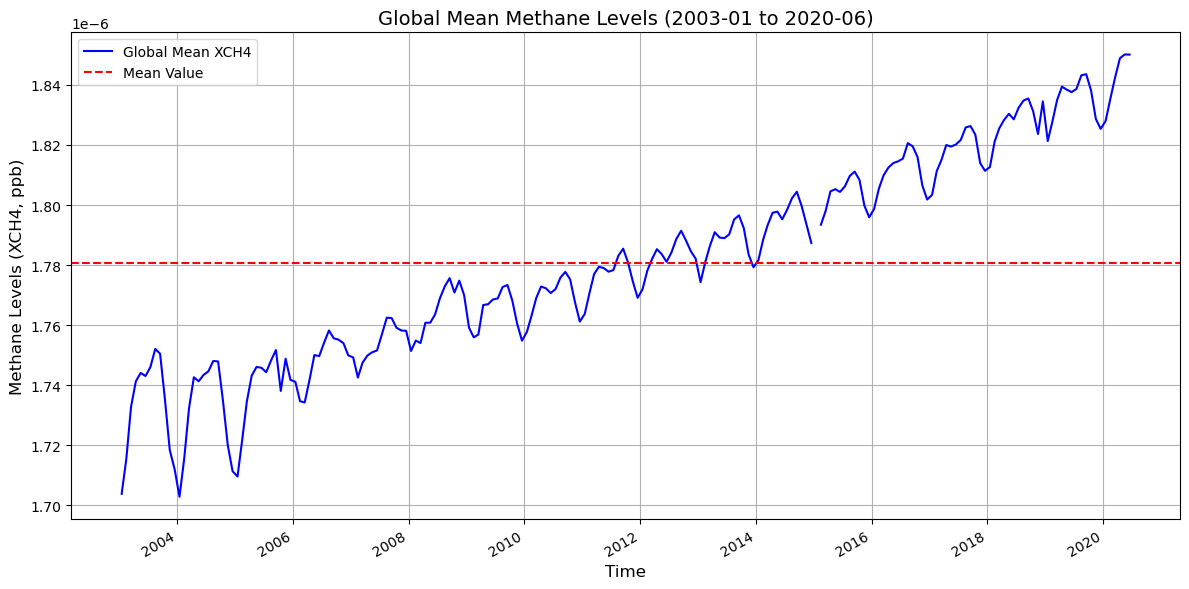

In [2]:
# 1.2：绘制 2003-01 至 2020-06 年全球平均甲烷时间序列图
global_mean_xch4 = xch4.mean(dim=["lat", "lon"])  # 计算全球平均

# 绘制时间序列图
plt.figure(figsize=(12, 6))
global_mean_xch4.plot(color="blue", label="Global Mean XCH4")
plt.axhline(global_mean_xch4.mean().item(), color="red", linestyle="--", label="Mean Value")
plt.title("Global Mean Methane Levels (2003-01 to 2020-06)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Methane Levels (XCH4, ppb)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

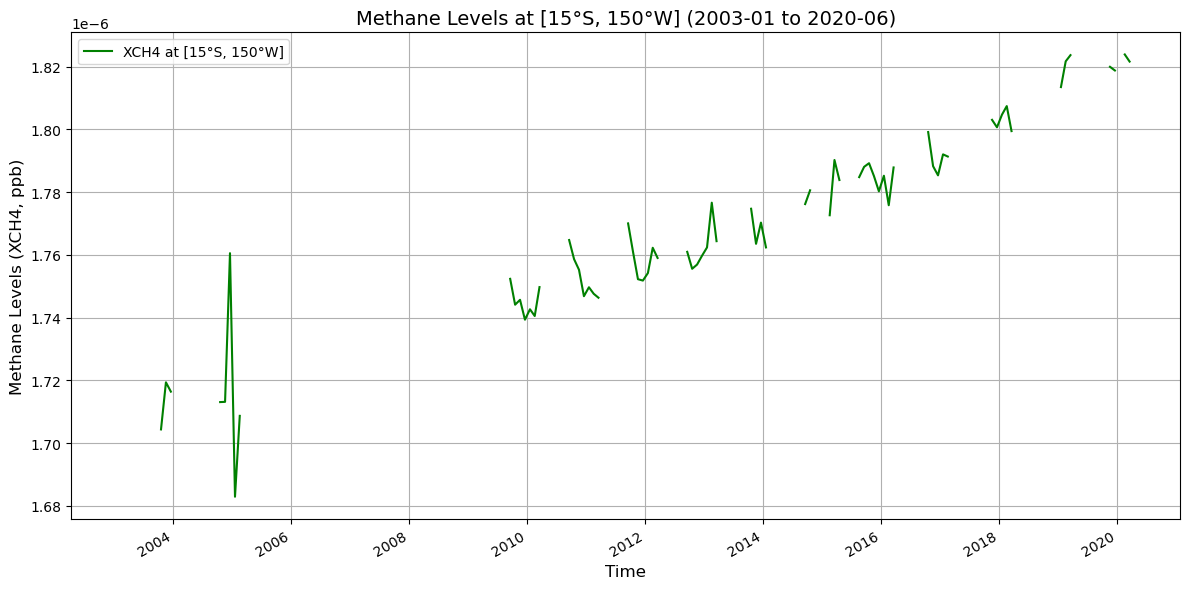

In [3]:
# 1.3：绘制 [15°S, 150°W] 点的反季节甲烷水平时间序列图
single_point_xch4 = xch4.sel(lat=-15, lon=-150, method="nearest")  # 提取点数据

# 绘制时间序列图
plt.figure(figsize=(12, 6))
single_point_xch4.plot(color="green", label="XCH4 at [15°S, 150°W]")
plt.title("Methane Levels at [15°S, 150°W] (2003-01 to 2020-06)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Methane Levels (XCH4, ppb)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
# 2.1 加载用户上传的 netCDF4 文件
file_path = 'NOAA_NCDC_ERSST_v3b_SST.nc'
data = xr.open_dataset(file_path)

# 查看数据变量和维度
data_details = data
data_details
# 定义尼诺 3.4 区域的经纬度范围
nino34_lat_range = slice(-5, 5)  # 纬度范围
nino34_lon_range = slice(190, 240)  # 经度范围 (170W to 120W)

# 提取尼诺 3.4 区域的海表温度
sst_nino34 = data['sst'].sel(lat=nino34_lat_range, lon=nino34_lon_range)

# 计算尼诺 3.4 区域的月平均气候资料 (1981-2010)
climatology = sst_nino34.sel(time=slice('1981-01', '2010-12')).groupby('time.month').mean(dim='time')

# 计算异常值
sst_anomalies = sst_nino34.groupby('time.month') - climatology

# 计算尼诺 3.4 区域的平均异常值
nino34_index = sst_anomalies.mean(dim=['lat', 'lon'])
print(nino34_index)

<xarray.DataArray 'sst' (time: 684)>
array([-4.23137784e-01, -5.67453265e-01, -3.68003547e-01, -2.98610806e-01,
       -2.95871198e-01, -4.49334830e-01, -2.18189105e-01, -8.47338736e-02,
       -2.42918342e-01, -4.52754736e-01, -4.04854417e-01, -2.86466926e-01,
       -2.95032263e-01, -2.33217061e-01, -3.40226173e-01, -2.96771467e-01,
       -6.63584620e-02,  1.47738308e-01, -1.46557823e-01, -5.18085539e-01,
       -8.69015634e-01, -8.65274429e-01, -5.40250659e-01, -4.95079994e-01,
       -5.48340797e-01, -5.54872394e-01, -5.35885394e-01, -5.78572392e-01,
       -6.82805657e-01, -5.18529832e-01, -3.52943897e-01, -4.16601449e-01,
       -7.63859034e-01, -7.39008069e-01, -8.61668229e-01, -9.43259358e-01,
       -8.04958522e-01, -4.55970496e-01, -3.02260909e-02,  6.17532581e-02,
       -2.08943993e-01, -1.47279445e-02,  6.11422062e-01,  6.95871532e-01,
        6.22277856e-01,  7.61360049e-01,  8.64577055e-01,  1.00811386e+00,
        7.47996449e-01,  4.24464703e-01, -2.30393395e-01, -7.46

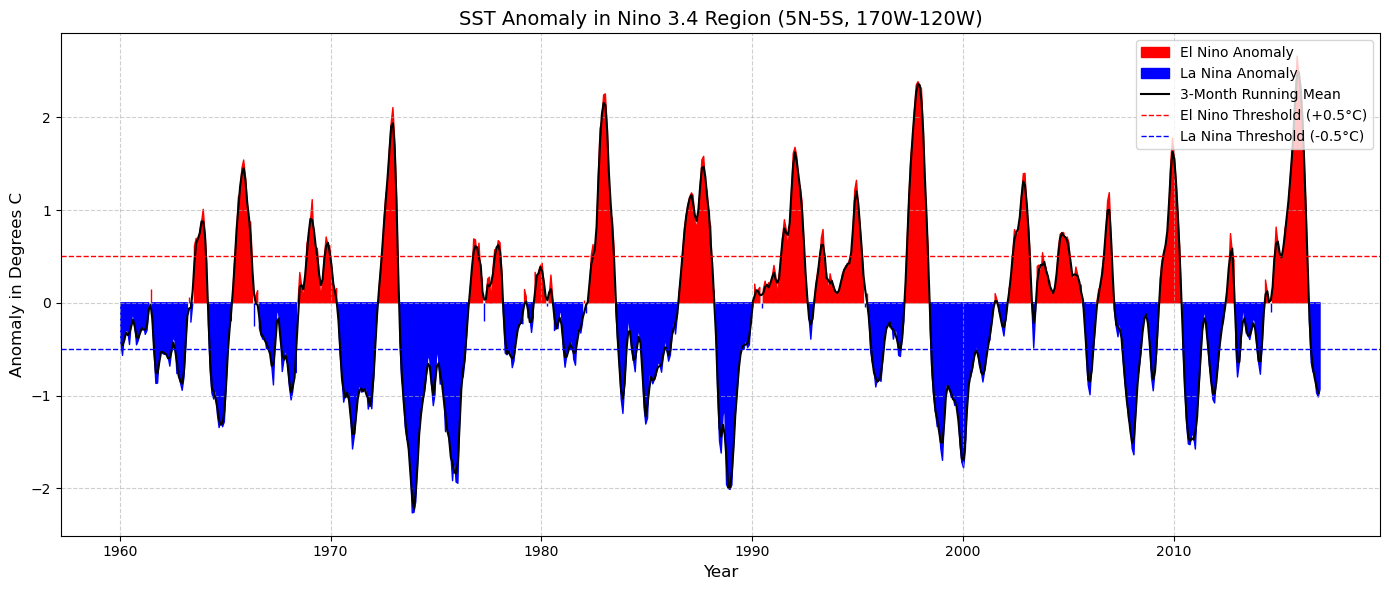

In [5]:
# 2.2 定义尼诺 3.4 区域的纬度和经度范围
nino34_lat_range = slice(-5, 5)  # 纬度范围
nino34_lon_range = slice(190, 240)  # 经度范围 (170W to 120W)

# 提取尼诺 3.4 区域的海表温度
sst_nino34 = data['sst'].sel(lat=nino34_lat_range, lon=nino34_lon_range)

# 计算尼诺 3.4 区域的月平均气候资料 (1981-2010)
climatology = sst_nino34.sel(time=slice('1981-01', '2010-12')).groupby('time.month').mean(dim='time')

# 计算异常值
sst_anomalies = sst_nino34.groupby('time.month') - climatology

# 计算尼诺 3.4 区域的平均异常值
nino34_index = sst_anomalies.mean(dim=['lat', 'lon'])

# 计算三个月移动平均值
nino34_index_smoothed = nino34_index.rolling(time=3, center=True).mean()

# 绘制图表
plt.figure(figsize=(14, 6))

# 绘制异常值区域，红色为正异常，蓝色为负异常
plt.fill_between(nino34_index['time'], nino34_index, 0, 
                 where=(nino34_index > 0), color='red', label='El Nino Anomaly')
plt.fill_between(nino34_index['time'], nino34_index, 0, 
                 where=(nino34_index < 0), color='blue', label='La Nina Anomaly')

# 绘制三个月移动平均值
plt.plot(nino34_index['time'], nino34_index_smoothed, color='black', label='3-Month Running Mean')

# 添加阈值线
plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label='El Nino Threshold (+0.5°C)')
plt.axhline(-0.5, color='blue', linestyle='--', linewidth=1, label='La Nina Threshold (-0.5°C)')

# 图表标题和标签
plt.title("SST Anomaly in Nino 3.4 Region (5N-5S, 170W-120W)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Anomaly in Degrees C", fontsize=12)

# 添加图例
plt.legend(loc='upper right')

# 添加网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()

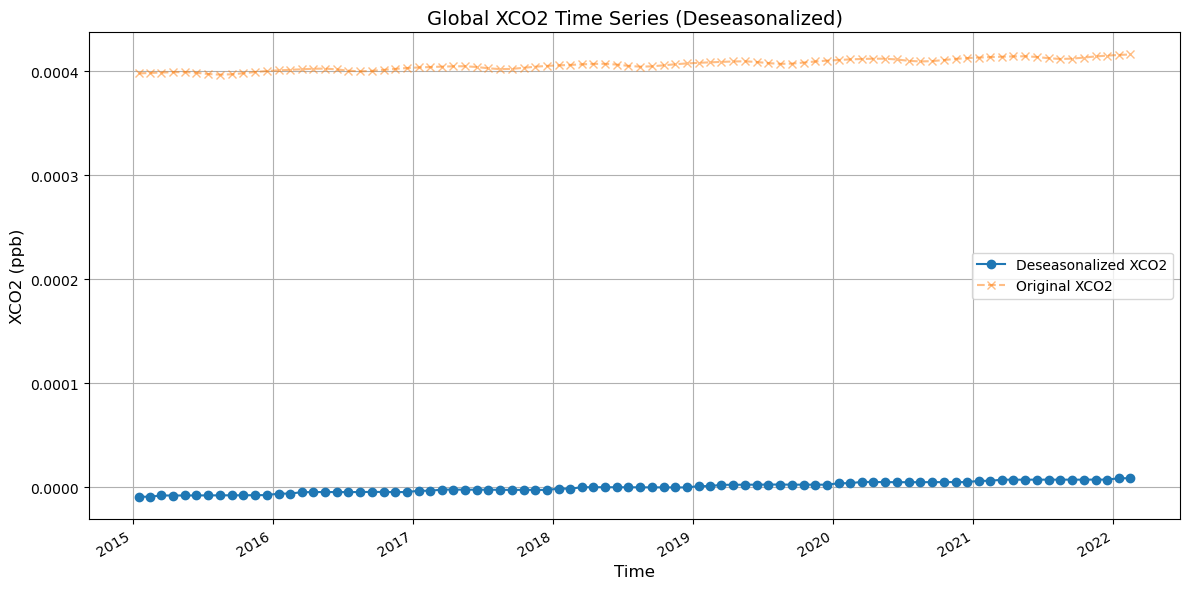

In [6]:
# 3.1 加载新的合并数据文件
file_path = 'oumerged_output.nc4'
data = xr.open_dataset(file_path)

# 查看数据结构和变量信息
data_overview = data
data_overview
# 3.1 绘制时间序列图，去掉每月的季节周期

# 计算 XCO2 的全球平均值
xco2_global_mean = data['XCO2'].mean(dim=['lat', 'lon'])

# 去掉季节周期（假设3个月内计算平均值）
seasonal_cycle = xco2_global_mean.groupby('time.month').mean()
xco2_deseasonalized = xco2_global_mean.groupby('time.month') - seasonal_cycle

# 绘制时间序列图
plt.figure(figsize=(12, 6))
xco2_deseasonalized.plot(marker='o', label='Deseasonalized XCO2')
xco2_global_mean.plot(marker='x', linestyle='--', label='Original XCO2', alpha=0.5)
plt.title('Global XCO2 Time Series (Deseasonalized)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('XCO2 (ppb)', fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

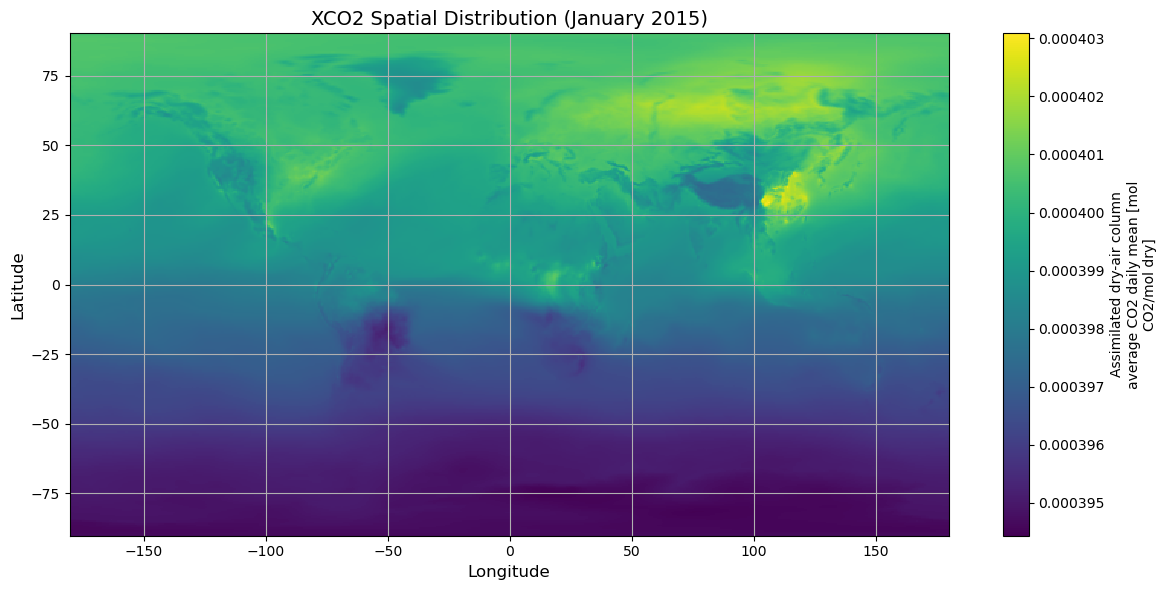

In [7]:
# 3.2 绘制至少 5 幅不同的图
# 图 1: XCO2 的空间分布（2015年1月）
plt.figure(figsize=(12, 6))
data['XCO2'].sel(time='2015-01-16').plot(cmap='viridis')
plt.title('XCO2 Spatial Distribution (January 2015)', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

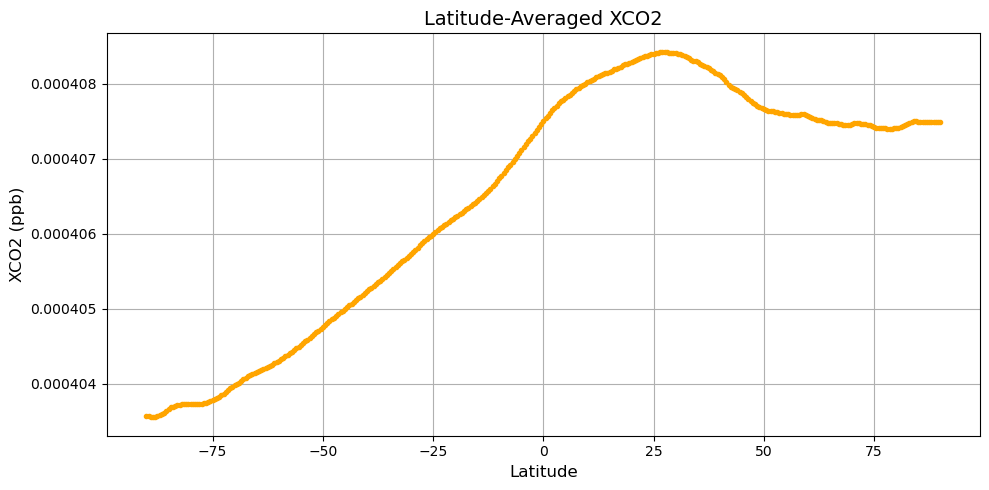

In [8]:
# 图 2: XCO2 的纬度平均分布（时间平均）
xco2_lat_mean = data['XCO2'].mean(dim=['lon', 'time'])
plt.figure(figsize=(10, 5))
xco2_lat_mean.plot(color='orange', marker='.')
plt.title('Latitude-Averaged XCO2', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('XCO2 (ppb)', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

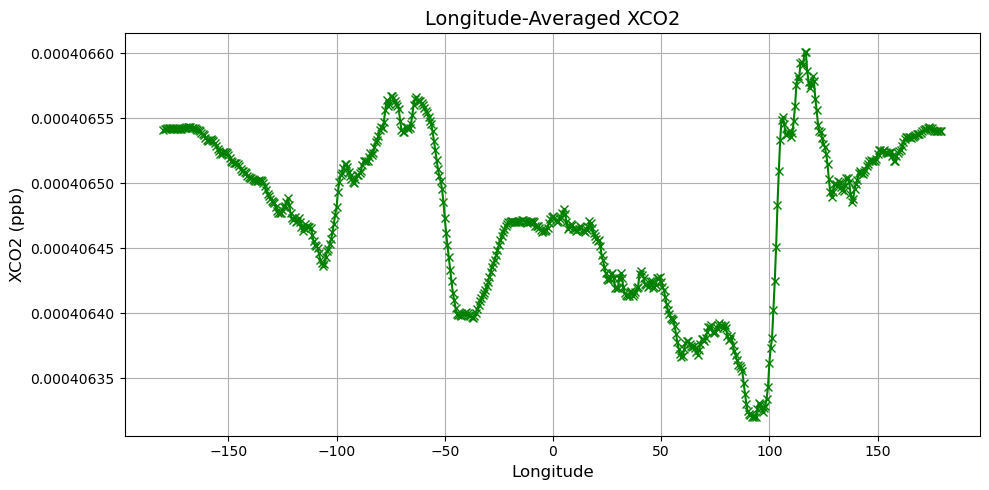

In [9]:
# 图 3: XCO2 的经度平均分布（时间平均）
xco2_lon_mean = data['XCO2'].mean(dim=['lat', 'time'])
plt.figure(figsize=(10, 5))
xco2_lon_mean.plot(color='green', marker='x')
plt.title('Longitude-Averaged XCO2', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('XCO2 (ppb)', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

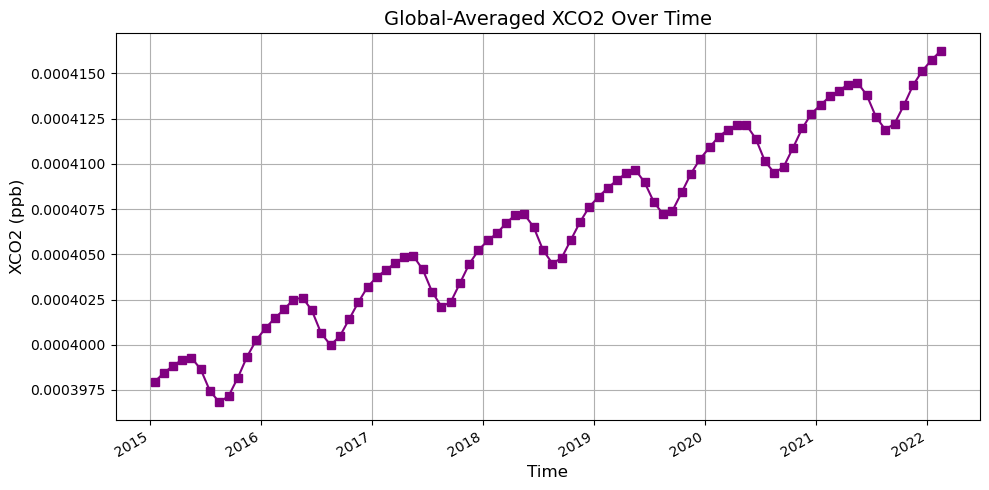

In [10]:
# 图 4: XCO2 的经纬平均分布随时间变化
xco2_time_mean = data['XCO2'].mean(dim=['lat', 'lon'])
plt.figure(figsize=(10, 5))
xco2_time_mean.plot(marker='s', color='purple')
plt.title('Global-Averaged XCO2 Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('XCO2 (ppb)', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

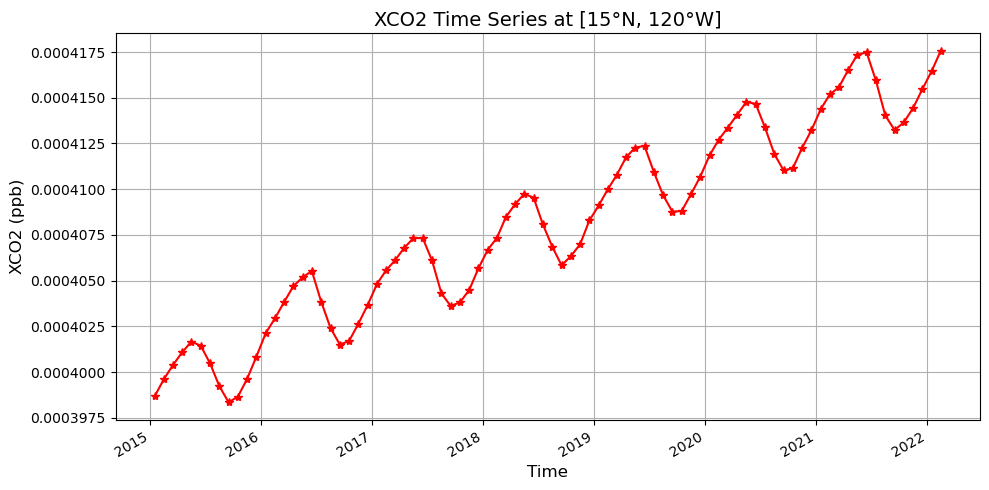

In [11]:
# 图 5: XCO2 的某一点时间序列（15°N, 120°W）
xco2_single_point = data['XCO2'].sel(lat=15, lon=-120, method='nearest')
plt.figure(figsize=(10, 5))
xco2_single_point.plot(marker='*', color='red')
plt.title('XCO2 Time Series at [15°N, 120°W]', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('XCO2 (ppb)', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
### Note: 最后两个图太像了 -1